In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import os


from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size = 48
folder_path = "images//"

In [3]:
batch_size  = 64

datagen_train  = ImageDataGenerator(1/255)
datagen_val = ImageDataGenerator(1/255)


train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              color_mode="grayscale",
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              color_mode="grayscale",
                                              class_mode='categorical',
                                              shuffle=False)

Found 28824 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [4]:
test_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [11]:
from keras.optimizers import Adam,SGD,RMSprop
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(256,(3,3), padding='same', input_shape=(picture_size, picture_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

# 2nd Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

# 4th Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))


# Flattening
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 256)       2560      
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 256)       1024      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 256)       590080    
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 256)      

In [9]:
"""from keras.optimizers import Adam,SGD,RMSprop
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(128,(3,3), padding='same', input_shape=(picture_size, picture_size, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()"""

"from keras.optimizers import Adam,SGD,RMSprop\n# Initialising the CNN\nmodel = Sequential()\n\n# 1 - Convolution\nmodel.add(Conv2D(128,(3,3), padding='same', input_shape=(picture_size, picture_size, 3)))\nmodel.add(BatchNormalization())\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\n# Flattening\nmodel.add(Flatten())\nmodel.add(Dense(7, activation='softmax'))\n\nopt = Adam(lr=0.001)\nmodel.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])\nmodel.summary()"

In [12]:
epochs = 60

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau


checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0001, mode='auto')

callbacks_list = [checkpoint,reduce_lr]

history = model.fit(train_set,
                    batch_size = 64,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

Epoch 1/60
451/451 [==============================] - 846s 2s/step - loss: 2.0629 - accuracy: 0.2367 - val_loss: 1.5707 - val_accuracy: 0.3928
Epoch 2/60
451/451 [==============================] - 846s 2s/step - loss: 1.6594 - accuracy: 0.3522 - val_loss: 1.4832 - val_accuracy: 0.4276
Epoch 3/60
451/451 [==============================] - 846s 2s/step - loss: 1.5246 - accuracy: 0.4078 - val_loss: 1.3966 - val_accuracy: 0.4690
Epoch 4/60
451/451 [==============================] - 847s 2s/step - loss: 1.4178 - accuracy: 0.4526 - val_loss: 1.3232 - val_accuracy: 0.4947
Epoch 5/60
451/451 [==============================] - 847s 2s/step - loss: 1.3512 - accuracy: 0.4799 - val_loss: 1.2929 - val_accuracy: 0.5055
Epoch 6/60
451/451 [==============================] - 846s 2s/step - loss: 1.2884 - accuracy: 0.5053 - val_loss: 1.2552 - val_accuracy: 0.5232
Epoch 7/60
451/451 [==============================] - 848s 2s/step - loss: 1.2547 - accuracy: 0.5216 - val_loss: 1.2186 - val_accuracy: 0.5359

In [13]:
import pickle
from tensorflow import keras
import tensorflow as tf


In [14]:
model.save("model4.h5")



In [17]:
load_model = tf.keras.models.load_model('model4.h5')

In [18]:
load_model.evaluate(test_set)

111/111 [==============================] - 33s 294ms/step - loss: 1.3152 - accuracy: 0.6469


[1.3151878118515015, 0.6469006538391113]

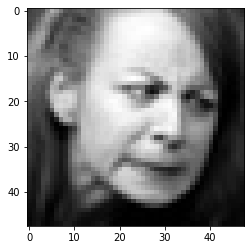

In [19]:
plt.imshow(test_set[0][0][0], cmap = 'gray')

In [20]:
#PROBAMOS MODELO
load_model.predict(test_set)[0]

KeyboardInterrupt: 

In [21]:
import cv2
import matplotlib.pyplot as plt

In [47]:
foto_test = cv2.imread('triste2.jpg', flags = cv2.IMREAD_GRAYSCALE)
foto_test = cv2.resize(foto_test, (48, 48)) / 255.0

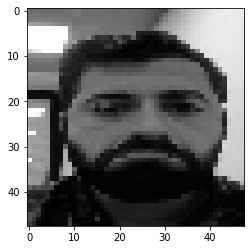

In [48]:
plt.imshow(foto_test, cmap = 'gray')

In [49]:
foto_test.shape

(48, 48)

In [51]:
foto_test_ok1 = foto_test.reshape(1, 48, 48, 1)

In [52]:
foto_test_ok1.shape

(1, 48, 48, 1)

In [53]:
np.round(load_model.predict(foto_test_ok1),4)

array([[4.342e-01, 3.000e-04, 4.690e-02, 2.373e-01, 1.407e-01, 5.190e-02,
        8.870e-02]], dtype=float32)